In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
import matplotlib.gridspec as gridspec

In [4]:
df = pd.read_table('Fig1C.csv', sep = "\t")
df.head()

,Sample,Population,Red,Green,Area (cm2),Greenness
0,Agl-0,Morocco,133.26610,152.74955,1.630691,1.150938
1,Agl-1,Morocco,131.40095,147.61610,0.926989,1.120931
2,Agl-2,Morocco,148.12560,164.70220,1.612010,1.114515
3,Agl-3,Morocco,145.50025,164.25660,1.639885,1.118583
4,Agl-5,Morocco,139.43695,159.45300,1.775735,1.149537


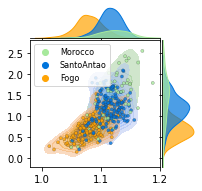

In [18]:
cm = 1/2.54
colors=['#A7E99C','#0075DC','#FFA405']
Order=['Morocco','SantoAntao','Fogo']
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(7.5*cm, 7.5*cm))
widths = [4, 1]
heights = [1, 4]
spec = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights,wspace=0.03, hspace=0.03)  
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])


axs[1].axis("off")

#Joint kde-scatterplot
sns.kdeplot(data=df, 
                x="Greenness", y="Area (cm2)",
                hue='Population',
                hue_order=Order,
                fill=True,
                alpha=0.5,
                ax=axs[2])
sns.scatterplot(data=df,
                  x="Greenness", y="Area (cm2)",
                  hue='Population',
                  hue_order=Order,
                  alpha=0.8,
                  s=10,
                  edgecolor=".2",
                  ax=axs[2])
axs[2].set_ylim([-0.2,2.8])
axs[2].set_xlim([0.98,1.2])
axs[2].legend(loc='upper left',fontsize=8)
axs[2].set_ylabel('',fontsize=10)
axs[2].set_xlabel('',fontsize=10)

#Hist Greenness
sns.kdeplot(data=df,
            x='Greenness',
            hue='Population',
            hue_order=Order,
            ax=axs[0],
            legend=False,
            alpha=0.7,
            fill=True)
axs[0].spines["left"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].set_xlim(axs[2].get_xlim())
axs[0].set_yticklabels([])
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[0].axes.get_yaxis().set_visible(False)

#Hist Area
sns.kdeplot(data=df,
            y='Area (cm2)',
            hue='Population',
            hue_order=Order,
            ax=axs[3],
            legend=False,
            alpha=0.7,
            fill=True)
axs[3].spines["bottom"].set_visible(False) 
axs[3].spines["right"].set_visible(False)
axs[3].spines["top"].set_visible(False)
axs[3].set_ylim(axs[2].get_ylim())
axs[3].set_yticklabels([])
axs[3].set_ylabel('')
axs[3].set_xticklabels([])
axs[3].set_xlabel('')
axs[3].axes.get_xaxis().set_visible(False)
plt.savefig("Fig1C.png", format="png",bbox_inches="tight",facecolor='w',dpi=800)